Polinomio de Taylor de orden 1: 1
Polinomio de Taylor de orden 2: 1 + (-1/2)*x^2
Polinomio de Taylor de orden 3: 1 + (-1/2)*x^2
Polinomio de Taylor de orden 4: 1 + (-1/2)*x^2 + (1/24)*x^4
Polinomio de Taylor de orden 5: 1 + (-1/2)*x^2 + (1/24)*x^4


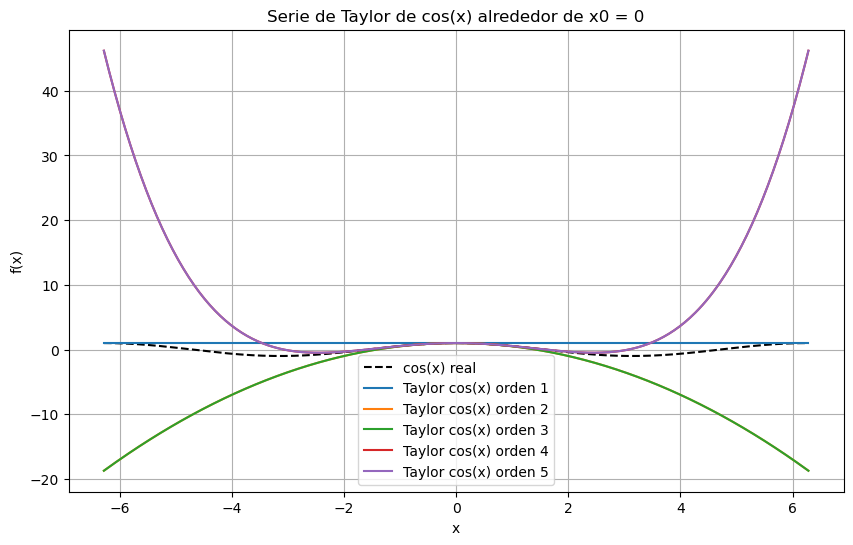

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from fractions import Fraction

def taylor_cos_term(x, n):
    """Calcula el término n-ésimo de la serie de Taylor de cos(x) alrededor de 0."""
    return ((-1)**n * x**(2*n)) / math.factorial(2*n)

def taylor_cos_polynomial_fraction(order):
    """Calcula el polinomio de Taylor de cos(x) de orden 'order' alrededor de 0 y devuelve el polinomio como string con fracciones."""
    terms = []
    for i in range(order // 2 + 1):  # Solo necesitamos términos pares
        numerator = (-1)**i
        denominator = math.factorial(2*i)
        coefficient_fraction = Fraction(numerator, denominator)
        if i == 0:
            terms.append("1")
        elif coefficient_fraction == 1:
            terms.append(f"x^{2*i}")
        elif coefficient_fraction == -1:
            terms.append(f"-x^{2*i}")
        else:
            terms.append(f"({coefficient_fraction})*x^{2*i}")
    return " + ".join(terms).replace("+ -", "- ")

def taylor_cos_approximation(x, order):
    """Calcula la aproximación de la serie de Taylor de cos(x) de orden 'order' alrededor de 0."""
    cos_approx = 0
    for i in range(order // 2 + 1):
        cos_approx += taylor_cos_term(x, i)
    return cos_approx

# Dominio de la función para la gráfica
x = np.linspace(-2*np.pi, 2*np.pi, 400)

# Órdenes de los polinomios de Taylor que queremos graficar
orders_to_plot = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
plt.plot(x, np.cos(x), label='cos(x) real', color='black', linestyle='--')

for order in orders_to_plot:
    plt.plot(x, taylor_cos_approximation(x, order), label=f'Taylor cos(x) orden {order}')
    polynomial_string = taylor_cos_polynomial_fraction(order)
    print(f"Polinomio de Taylor de orden {order}: {polynomial_string}")

# Añadir título y etiquetas a la gráfica
plt.title('Serie de Taylor de cos(x) alrededor de x0 = 0')
plt.xlabel('x')
plt.ylabel('f(x)')

# Añadir leyenda para identificar las curvas
plt.legend()

# Mostrar una cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar la gráfica
plt.show()